In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若想使用可自行開啟)
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train, flatten=False)
x_test = preproc_x(x_test, flatten=False)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, proc_num=2):
    input_layer = keras.layers.Input(input_shape)
    
    for i in range(proc_num):
        if i == 0:
            x = keras.layers.Conv2D(32, (3, 3), padding='same', activation="relu")(input_layer)
            x = keras.layers.Conv2D(32, (3, 3), padding='same', activation="relu")(x)
            x = keras.layers.MaxPooling2D(pool_size=(2, 2))(x)
            x = keras.layers.Dropout(0.25)(x)
        else:
            x = keras.layers.Conv2D(32, (3, 3), padding='same', activation="relu")(x)
            x = keras.layers.Conv2D(32, (3, 3), padding='same', activation="relu")(x)
            x = keras.layers.MaxPooling2D(pool_size=(2, 2))(x)
            x = keras.layers.Dropout(0.25)(x)
    
    x = keras.layers.Flatten()(x)
    x = keras.layers.Dense(units=512, activation='relu')(x)
    x = keras.layers.Dropout(0.25)(x)

    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-3
EPOCHS = 20
BATCH_SIZE_EXP = [256, 128, 64, 32]

In [7]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for batch_size in BATCH_SIZE_EXP:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with BATCH_SIZE = %d" % batch_size)
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=batch_size, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-BatchSize-%s" % str(batch_size)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with BATCH_SIZE = 256
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 32)        0         
______________________________________________________

50000/50000 [==============================] - 105s 2ms/step - loss: 1.1570 - acc: 0.5858 - val_loss: 0.9929 - val_acc: 0.6456
Epoch 3/20
50000/50000 [==============================] - 104s 2ms/step - loss: 0.9824 - acc: 0.6497 - val_loss: 0.9043 - val_acc: 0.6819
Epoch 4/20
50000/50000 [==============================] - 104s 2ms/step - loss: 0.8730 - acc: 0.6907 - val_loss: 0.8322 - val_acc: 0.7078
Epoch 5/20
50000/50000 [==============================] - 104s 2ms/step - loss: 0.7893 - acc: 0.7215 - val_loss: 0.7859 - val_acc: 0.7223
Epoch 6/20
50000/50000 [==============================] - 104s 2ms/step - loss: 0.7337 - acc: 0.7418 - val_loss: 0.7382 - val_acc: 0.7442
Epoch 7/20
50000/50000 [==============================] - 104s 2ms/step - loss: 0.6688 - acc: 0.7638 - val_loss: 0.7286 - val_acc: 0.7429
Epoch 8/20
50000/50000 [==============================] - 104s 2ms/step - loss: 0.6187 - acc: 0.7812 - val_loss: 0.7368 - val_acc: 0.7465
Epoch 9/20
50000/50000 [=====================

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 127s 3ms/step - loss: 1.4635 - acc: 0.4684 - val_loss: 1.1499 - val_acc: 0.5824
Epoch 2/20
50000/50000 [==============================] - 126s 3ms/step - loss: 1.0632 - acc: 0.6210 - val_loss: 0.9587 - val_acc: 0.6544
Epoch 3/20
50000/50000 [==============================] - 126s 3ms/step - loss: 0.9144 - acc: 0.6770 - val_loss: 0.8842 - val_acc: 0.6906
Epoch 4/20
50000/50000 [==============================] - 126s 3ms/step - loss: 0.8140 - acc: 0.7116 - val_loss: 0.8192 - val_acc: 0.7102
Epoch 5/20
50000/50000 [==============================] - 126s 3ms/step - loss: 0.7386 - acc: 0.7382 - val_loss: 0.7471 - val_acc: 0.7388
Epoch 6/20
50000/50000 [==============================] - 126s 3ms/step - loss: 0.6753 - acc: 0.7628 - val_loss: 0.7406 - val_acc: 0.7455
Epoch 7/20
50000/50000 [==============================] - 126s 3ms/step - loss: 0.6296 - acc: 0.7766 - val_loss: 0.7172 - 

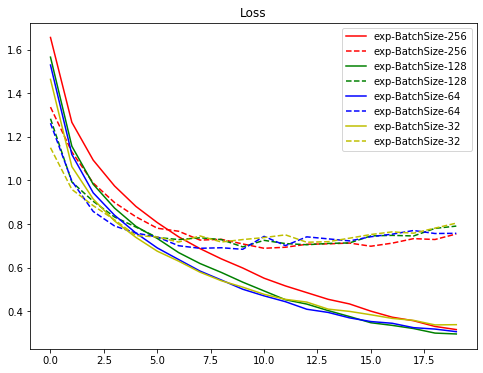

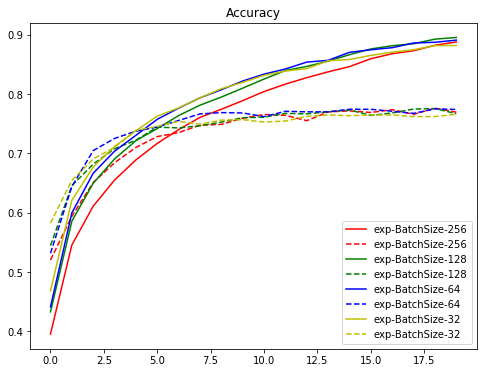

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()